In [530]:
import numpy as np
import matplotlib.pyplot as plt

# Some things for plots
%matplotlib inline
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=["#F00D2C", "#242482",  "#0071BE"])
mpl.rcParams['figure.dpi']= 200

Text(0,0.5,'$y$')

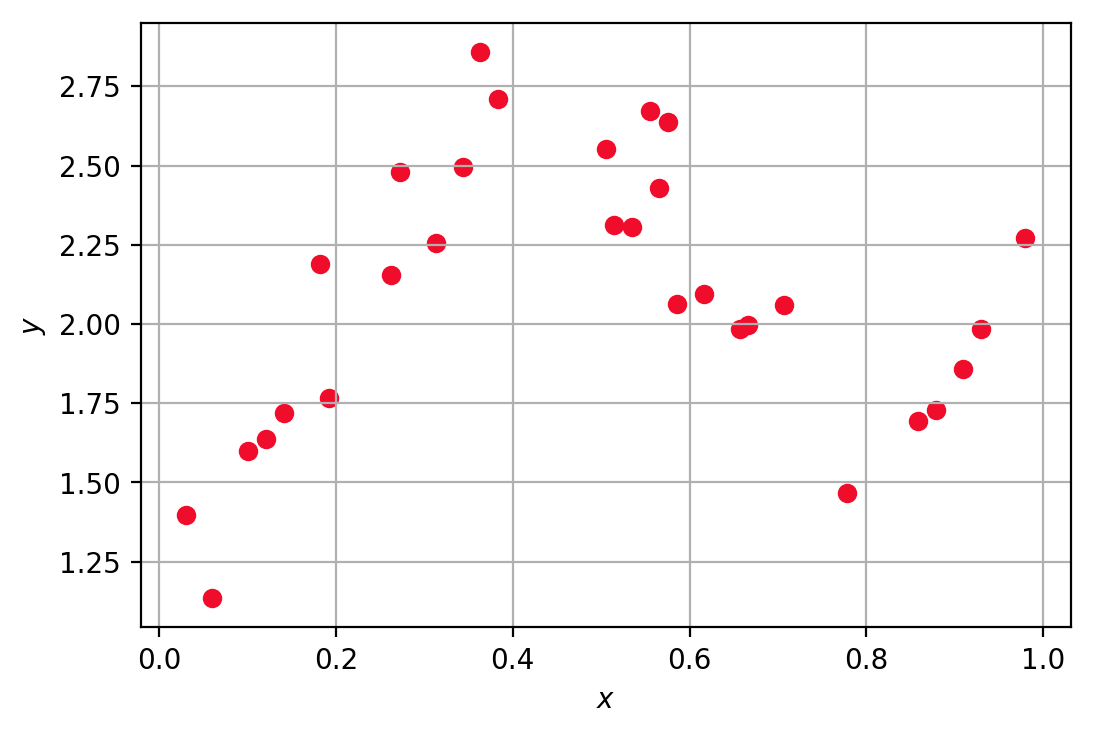

In [531]:
data = np.loadtxt('data_lec_11.txt')
x_data = data[:,0]
y_data = data[:,1]

# plot
plt.figure()
plt.grid()
plt.scatter(x_data, y_data)
plt.xlabel('$x$')
plt.ylabel('$y$')

In [532]:
training_set = data[0:20, :]
x_training = training_set[:, 0]
y_training = training_set[:, 1]

validation_set = data[20:24, :]
x_validation = validation_set[:, 0]
y_validation = validation_set[:, 1]

testing_set = data[24:30, :]
x_testing = testing_set[:, 0]
y_testing = testing_set[:, 1]

In [533]:
models_N = range(1,10)

model_performance = np.zeros(len(models_N))
training_performance = np.zeros(len(models_N))

# loop over each model
for (i,N) in enumerate(models_N):
    # train model N (aka N basis elements) with training set
    Phi = np.vander(x_training, N, increasing = True)
    theta_ls = np.linalg.lstsq(Phi, y_training, rcond=None)[0]
    y_model = np.matmul(Phi, theta_ls)
    r = y_model - y_training
    training_performance[i] = np.linalg.norm(r)/np.linalg.norm(y_training)

    # calculate performance with validation set
    Phi_model = np.vander(x_validation, N, increasing = True)
    y_model = np.matmul(Phi_model, theta_ls)
    r = y_model - y_validation
 
    # save performance, here we'll use rel error
    model_performance[i] = np.linalg.norm(r)/np.linalg.norm(y_validation)

Best model: N = 3


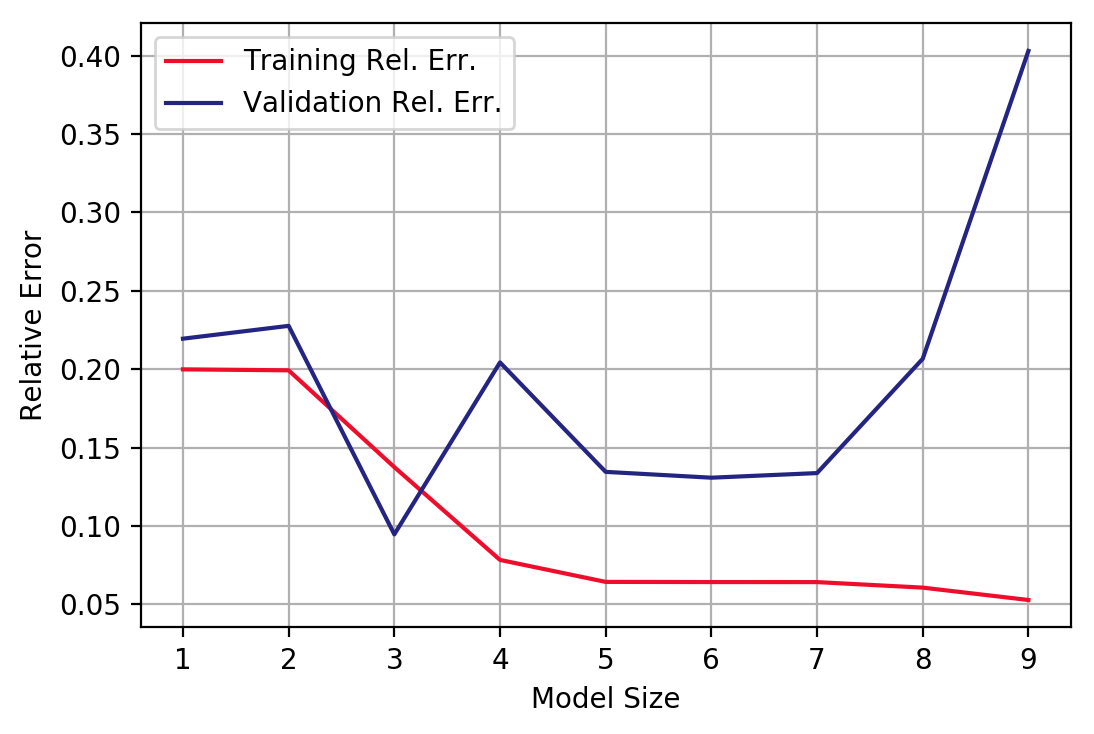

In [534]:
# Plot each model's performance
plt.figure()
plt.plot(models_N, training_performance)
plt.plot(models_N, model_performance)
plt.xlabel('Model Size')
plt.ylabel('Relative Error')

plt.grid()
plt.legend(['Training Rel. Err.', 'Validation Rel. Err.'])

# Pick best performing model
i_best = np.argmin(model_performance)
N_best = models_N[i_best]
print("Best model: N = " + str(N_best))

In [518]:
# retrain best model with training set
Phi = np.vander(x_training, N_best, increasing = True)
theta_ls_v = np.linalg.lstsq(Phi, y_training, rcond=None)[0]
      
# Now compare the final performance of the best model against testing set
Phi_model = np.vander(x_testing, N_best, increasing = True)
y_model = np.matmul(Phi_model, theta_ls_v)
r = y_model - y_testing
rel_err = np.linalg.norm(r)/np.linalg.norm(y_testing)
print("Rel. Error for testing set: " + str(rel_err))

Rel. Error for testing set: 0.19222201421378837


Text(0,0.5,'$y$')

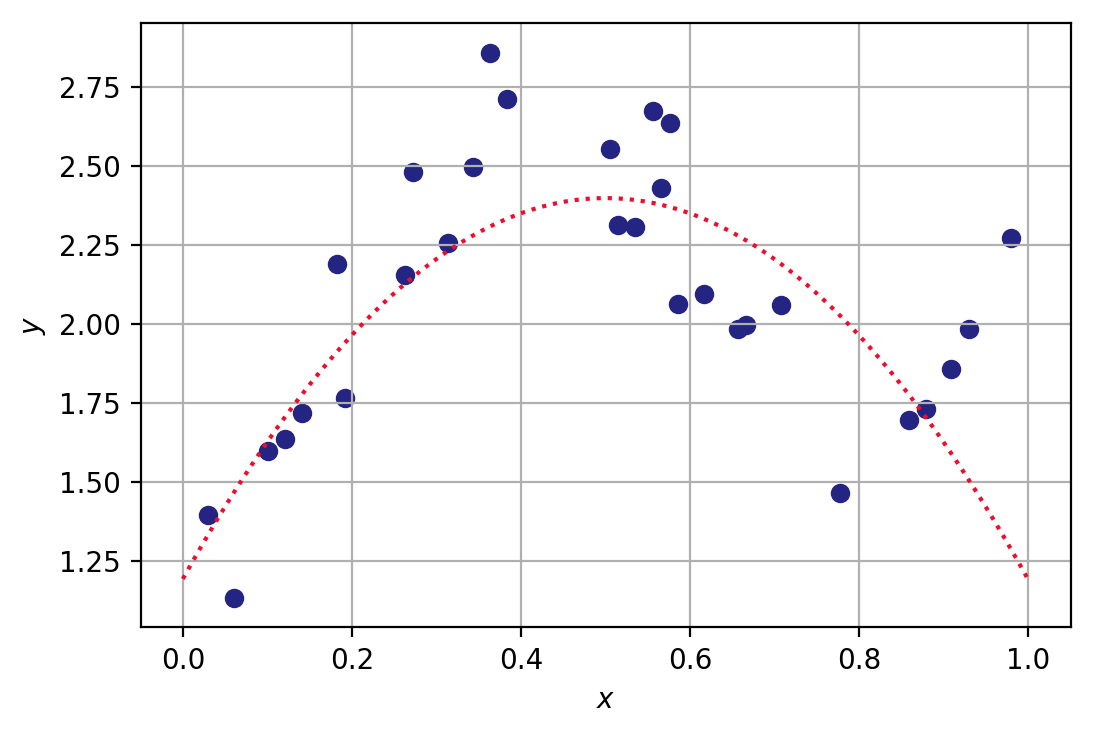

In [537]:
# Plot the best model, along with data sets
x_plot = np.linspace(0, 1, 100)

# The model derived after normal validation
Phi_plot = np.vander(x_plot, N_best, increasing = True)
y_plot = np.matmul(Phi_plot, theta_ls_v)

# Plot the two models, along with data
plt.plot(x_plot, y_plot, linestyle=':', color="#F00D2C")
plt.scatter(data[:,0], data[:,1], color="#242482")

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')

In [542]:
# k fold cross-validation
training_set = data[0:24, :]

testing_set = data[24:30, :]
x_testing = testing_set[:, 0]
y_testing = testing_set[:, 1]

# pick number of subsets of training sets
k = 4
I = np.arange(24)

# loop over models
for (i,N) in enumerate(models_N):

    # perform k validations and save performance for each validation    
    model_performance_j = np.zeros(k)
    for j in range(k):
        # define j-th validation and training sets
        # using boolean indexing
        validation_set_j = training_set[(I % k) == j, :]
        training_set_j = training_set[(I % k) != j, :]
        
        # pick out input and output vectors from training set
        x_training_j = training_set_j[:, 0]
        y_training_j = training_set_j[:, 1]
        
        # pick out input and output vectors from validation set
        x_validation_j = validation_set_j[:, 0]
        y_validation_j = validation_set_j[:, 1]
        
        # train with training set
        Phi = np.vander(x_training_j, N, increasing = True)
        theta_ls = np.linalg.lstsq(Phi, y_training_j, rcond=None)[0]
        
        # calculate residual with validation set
        Phi_model = np.vander(x_validation_j, N, increasing = True)
        y_model = np.matmul(Phi_model, theta_ls)
        r = y_model - y_validation_j
        
        # save performance for the j-th validation set
        model_performance_j[j] = np.linalg.norm(r)/np.linalg.norm(y_validation_j)
        
    # Overall model performance for the i-th model is 
    # just the average over all validation sets
    model_performance[i] = np.mean(model_performance_j)
    
# At the end of this loop, model_performance will hold 
# the validation performance for each model

Best model: N = 5


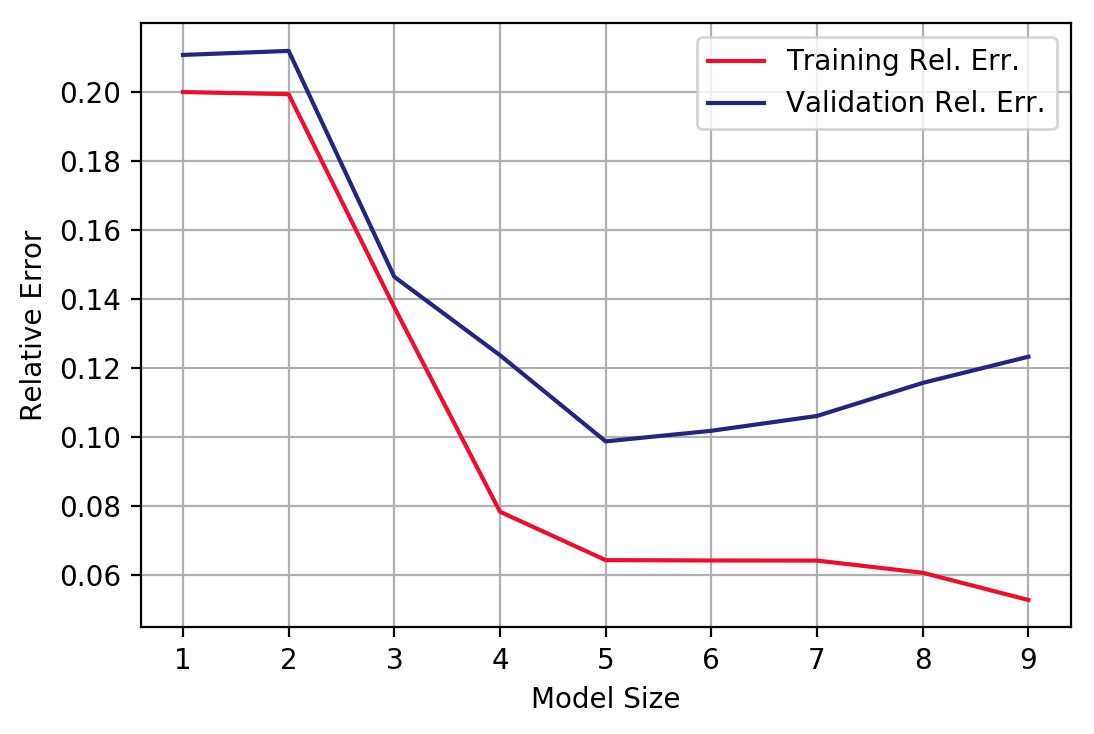

In [543]:
# Plot each model's performance after cross validation
plt.figure()
plt.plot(models_N, training_performance)
plt.plot(models_N, model_performance)


plt.xlabel('Model Size')
plt.ylabel('Relative Error')
plt.grid()
plt.legend(['Training Rel. Err.', 'Validation Rel. Err.'])

# Pick best performing model
i_best_cv = np.argmin(model_performance)
N_best_cv = models_N[i_best_cv]
print("Best model: N = " + str(N_best_cv))

In [539]:
# retrain the best model with training set
Phi = np.vander(x_training, N_best_cv, increasing = True)
theta_ls_cv = np.linalg.lstsq(Phi, y_training, rcond=None)[0]
      
# Now compare the final performance of the best model against testing set
Phi_model = np.vander(x_testing, N_best_cv, increasing = True)
y_model = np.matmul(Phi_model, theta_ls_cv)
r = y_model - y_testing
rel_err = np.linalg.norm(r)/np.linalg.norm(y_testing)

print("Rel. error for testing set: " + str(rel_err))

Rel. error for testing set: 0.09098803907427584


Text(0,0.5,'$y$')

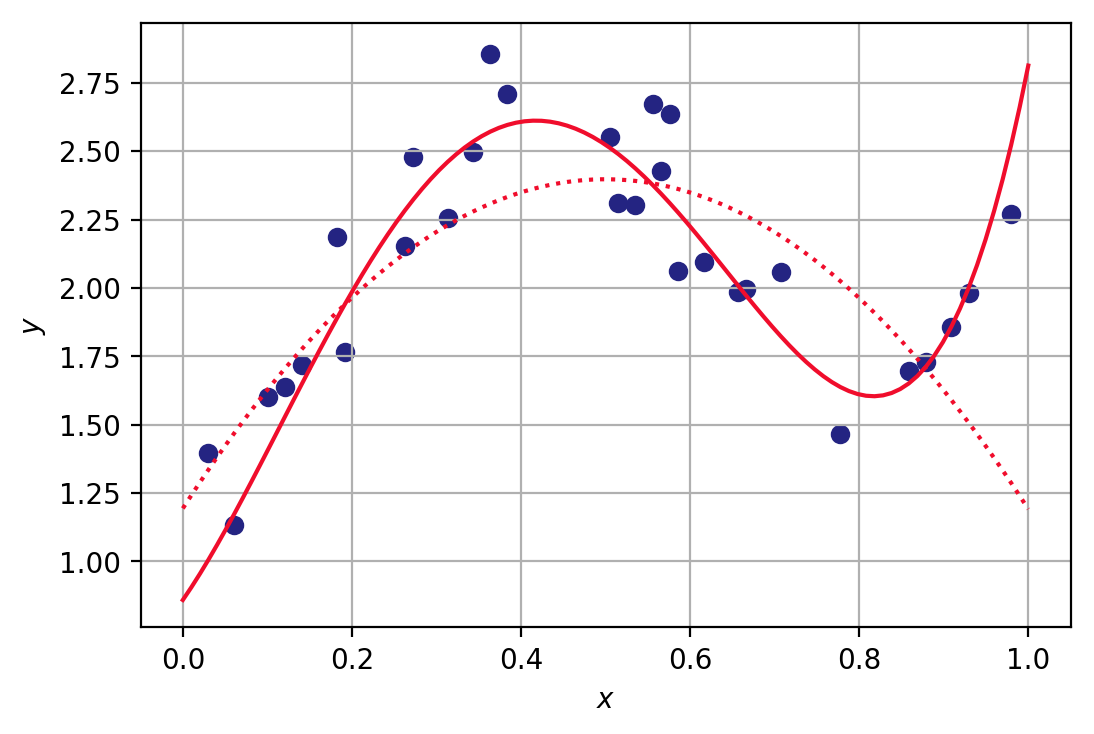

In [538]:
# Plot the best model, along with data sets
x_plot = np.linspace(0, 1, 100)

# The model derived after normal validation
Phi_plot = np.vander(x_plot, N_best, increasing = True)
y_plot = np.matmul(Phi_plot, theta_ls_v)

# The model derived from cross-validation
Phi_plot = np.vander(x_plot, N_best_cv, increasing = True)
y_plot_cv = np.matmul(Phi_plot, theta_ls_cv)

# Plot the two models, along with data
plt.plot(x_plot, y_plot, linestyle=':', color="#F00D2C")
plt.plot(x_plot, y_plot_cv, color="#F00D2C")
plt.scatter(data[:,0], data[:,1], color="#242482")

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')

## Residual Analysis

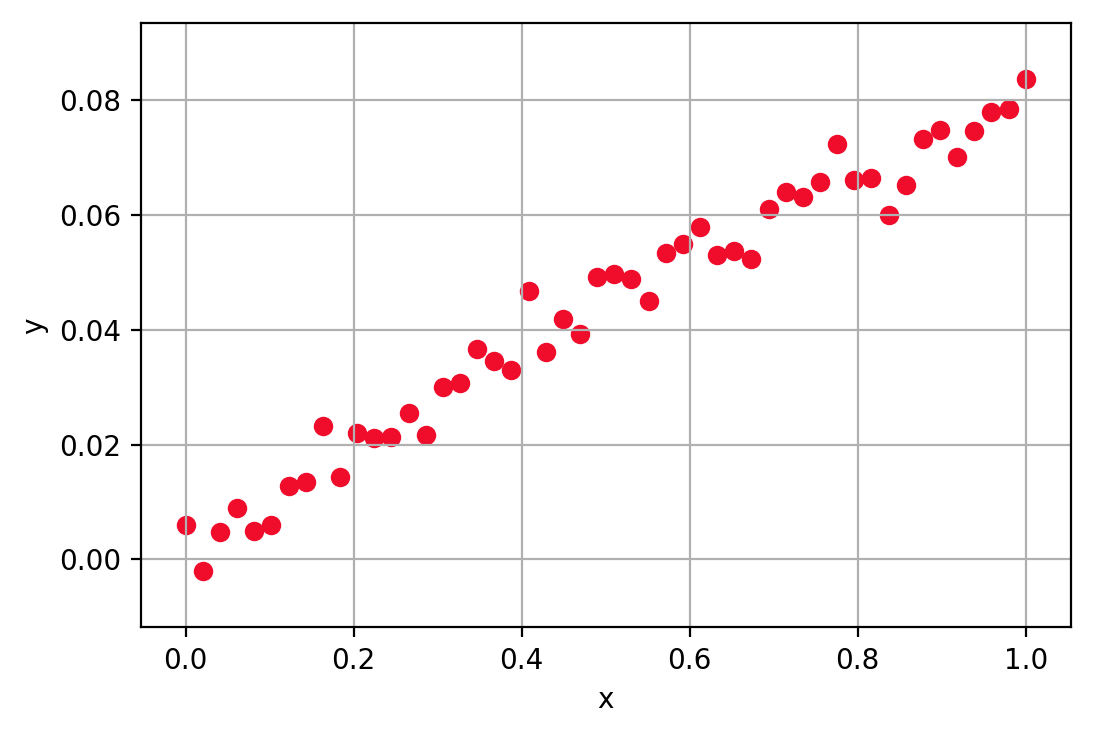

In [651]:
#x_data = np.linspace(0, 1, 50)
#y_true =  0.1*x_data - 0.02*x_data**2
#W = np.random.normal(0, 0.004, len(x_data))
#y_data = y_true + W
#data2 = np.zeros([50, 2])
#data2[:, 0] = x_data
#data2[:, 1] = y_data
#np.savetxt('data2_lec_11.txt', data2)

data2 = np.loadtxt('data2_lec_11.txt')
x_data = data2[:, 0]
y_data = data2[:, 1]
plt.scatter(x_data, y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

R2 = 0.9584601131871955


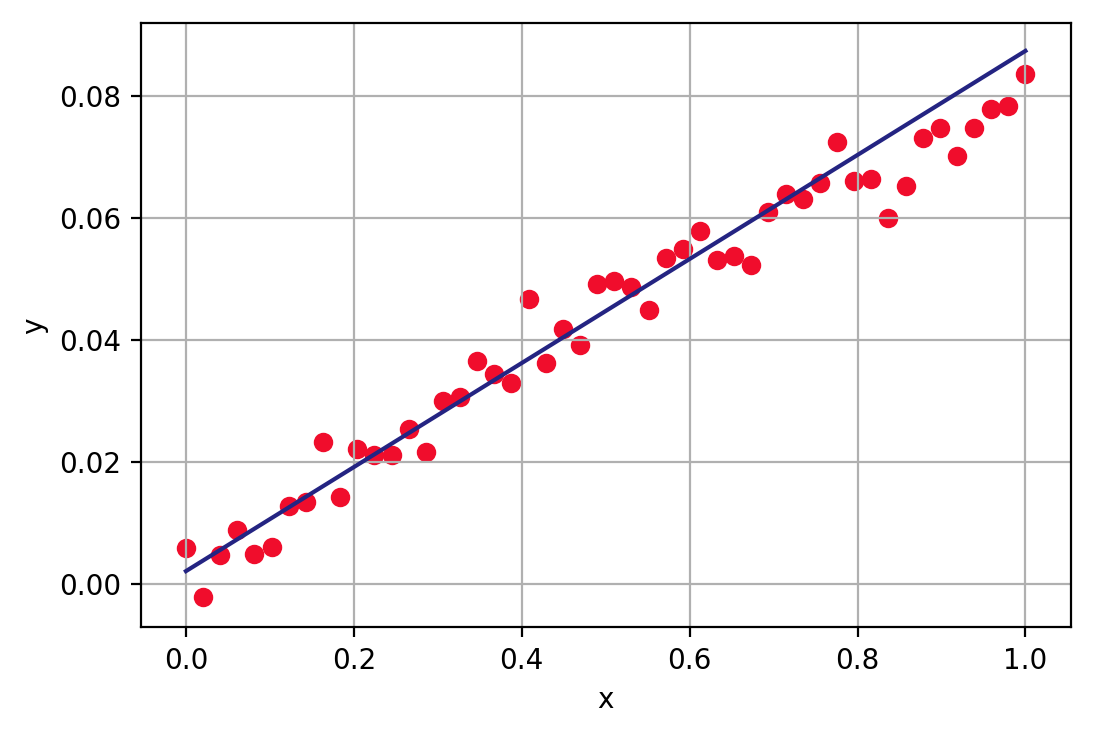

In [656]:
# Let's use a simple linear model: 
# phi_0 = 1, phi_1 = x
Phi = np.vander(x_data[0:40], 2)
# least squares solution
theta_ls = np.linalg.lstsq(Phi, y_data[0:40], rcond=None)[0]

# Compare model versus observations
Phi = np.vander(x_data, 2)
y_model = np.matmul(Phi, theta_ls)

#plt.scatter(y_model, y_data)


x_plot = np.linspace(0, 1, 100)
Phi_plot = np.vander(x_plot, 2)
y_plot = np.matmul(Phi_plot, theta_ls)
plt.plot(x_plot, y_plot, color="#242482")
plt.scatter(x_data, y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()


# R2 value
from sklearn import metrics
r2 = metrics.r2_score(y_data, y_model)

print("R2 = " + str(r2))

(-0.025, 0.025)

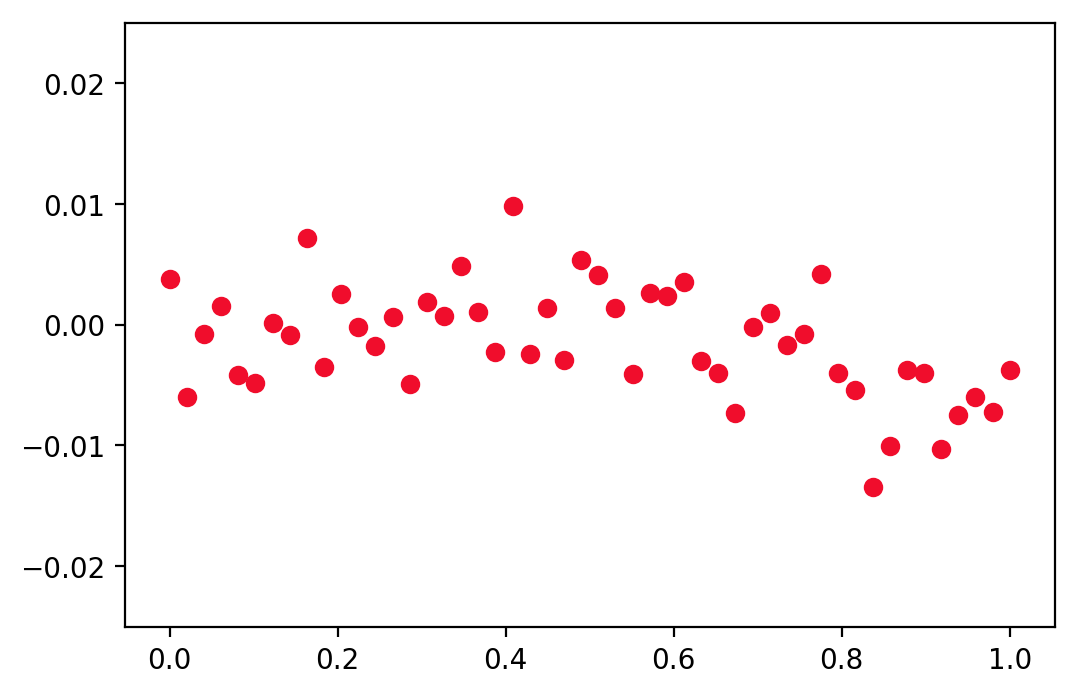

In [653]:
# Residual - this should be small
r = y_data - y_model
plt.scatter(x_data, r)
plt.ylim([-0.025, 0.025])

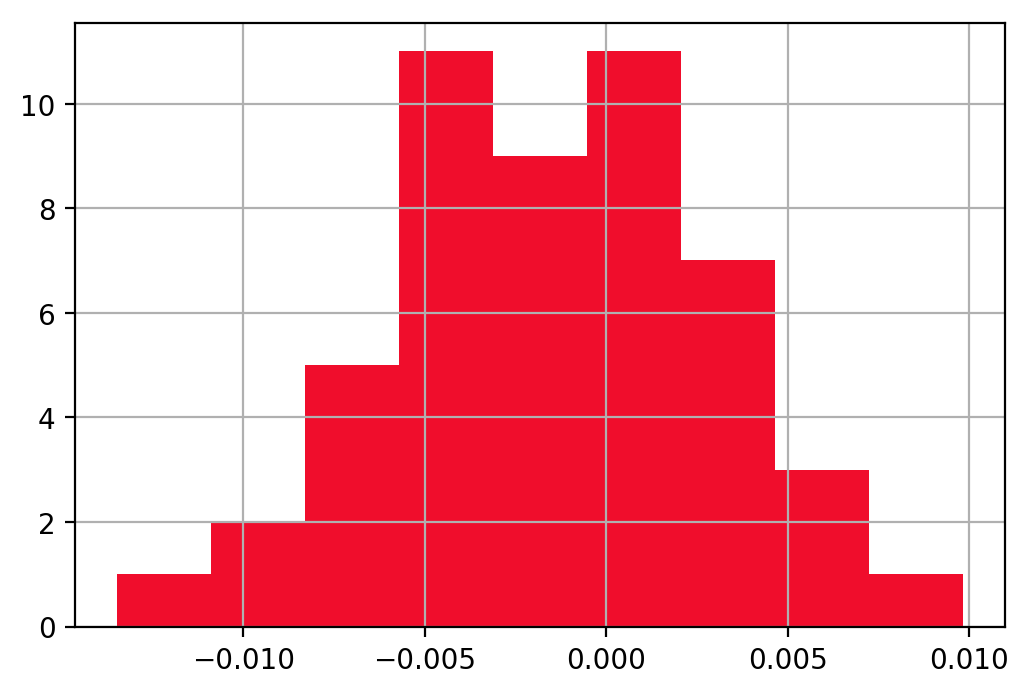

In [667]:
plt.hist(r, bins=9)
plt.grid()

In [673]:
mu = np.mean(r)
sig = np.std(r)

from scipy.stats import skew
skew(r)

-0.12610237009151978

Text(0,0.5,'r')

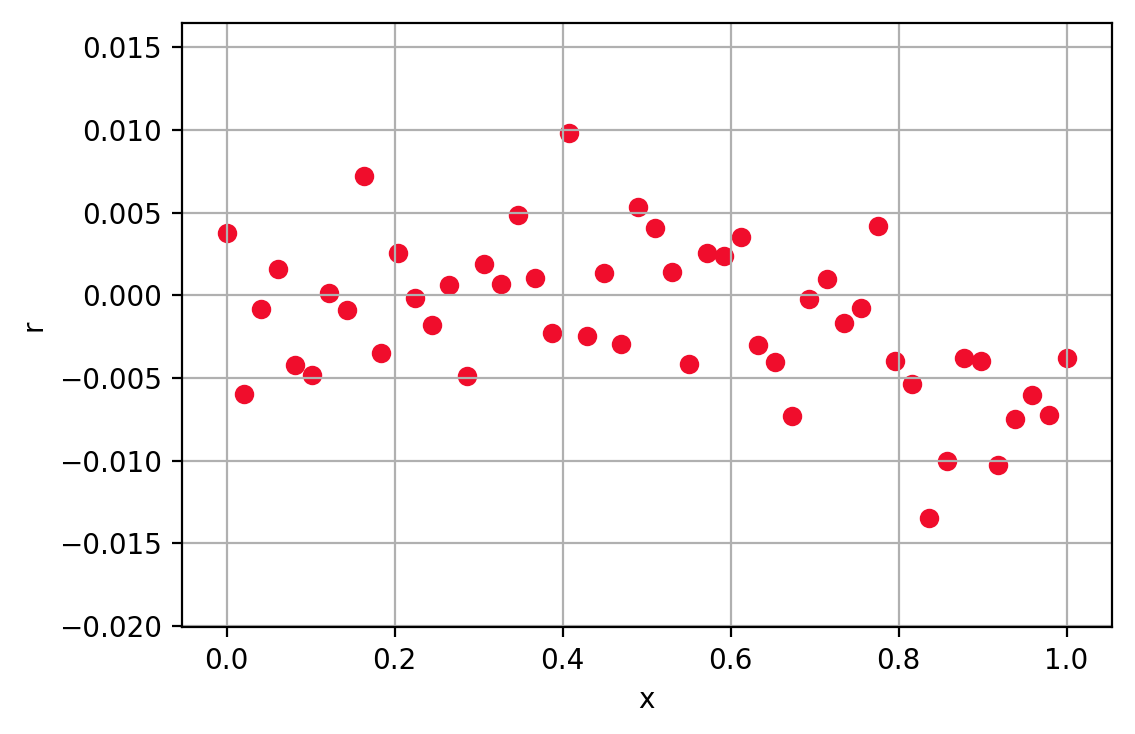

In [676]:
plt.scatter(x_data, r)
plt.grid()
plt.xlabel('x')
plt.ylabel('r')

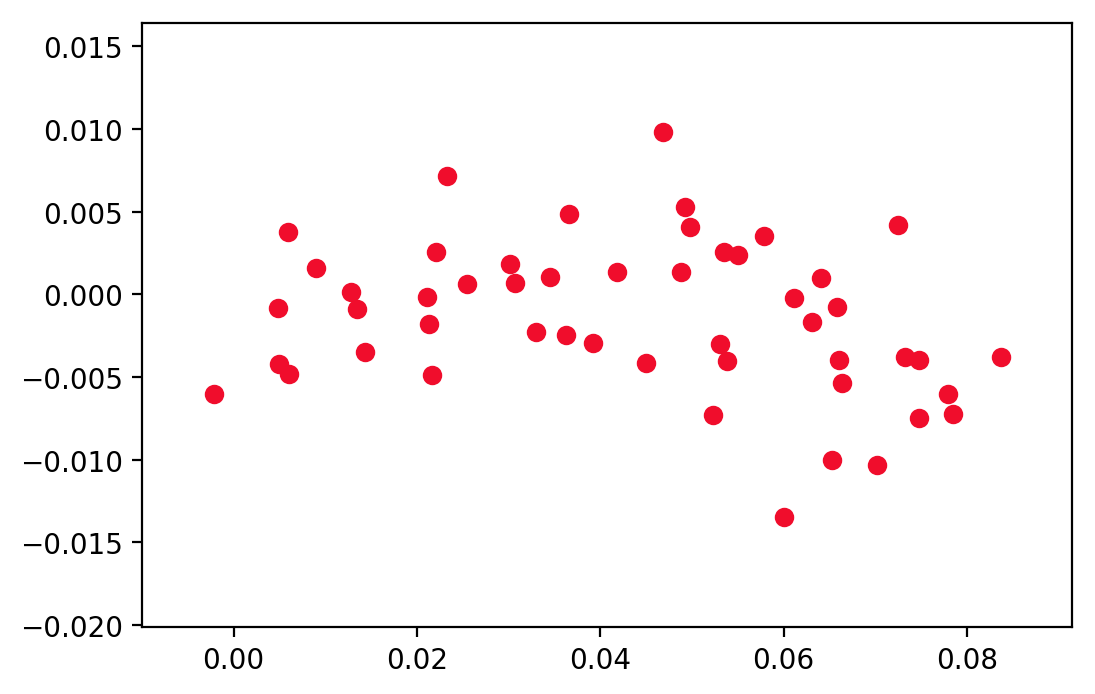

In [678]:
plt.scatter(y_data, r)

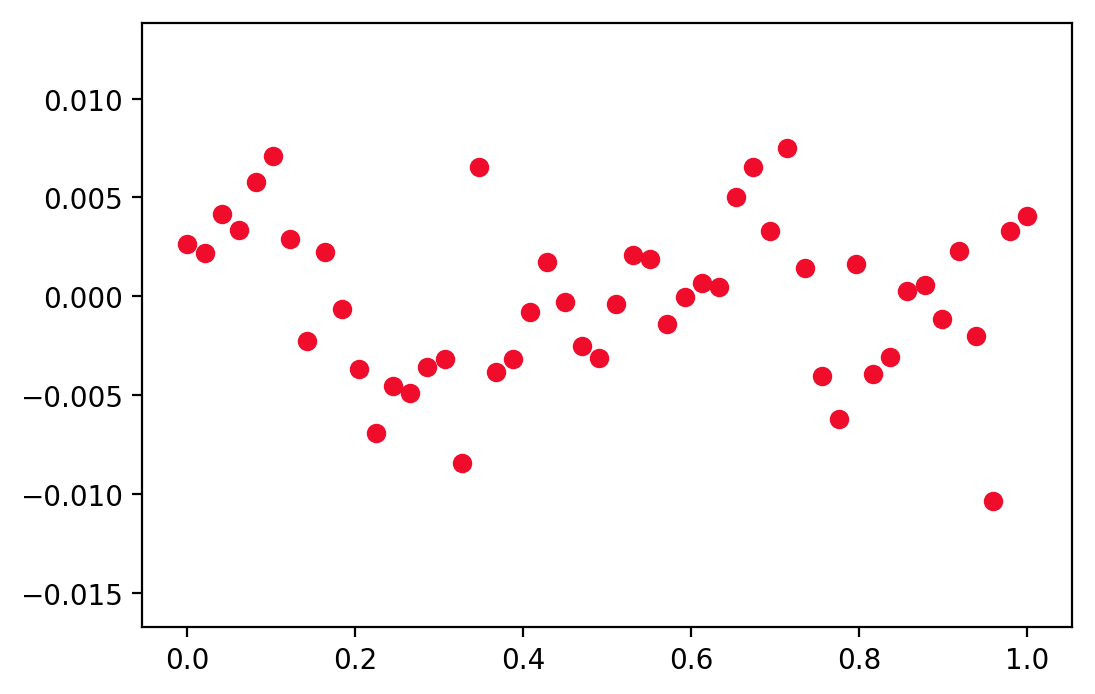

In [687]:
plt.scatter(x_data, np.random.normal(0, 0.004, 50))